<a href="https://colab.research.google.com/github/BrunaCFerreiraAzevedo/PredicaoFraude/blob/V1/tcc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UTILIZANDO RANDOM FOREST**

In [ ]:
#Importando bibliotecas de treino
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import IsolationForest
import numpy as np # linear algebra
import pandas as pd
!pip install opendatasets --upgrade --quiet

import opendatasets as od
download_url = 'https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection'
od.download(download_url)


df= pd.read_csv('./online-payment-fraud-detection/onlinefraud.csv')
df


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

Abort: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Criar a coluna 'day' calculando os dias a partir de 'step' (considerando 24 horas por dia)
df['day'] = (df['step'] // 24) + 1

# Criar a coluna 'hour', que calcula as horas restantes no dia a partir de 'step'
df['hour'] = (df['day'] * 24) - df['step']

# Criar a coluna 'typeDest', pegando o primeiro caractere de 'nameDest'
df['typeDest'] = df['nameDest'].str[0]

# Criar a coluna 'emptyAccount', verificando se a conta foi esvaziada
df['emptyAccount'] = np.where((df['oldbalanceOrg'] > 0) & (df['newbalanceOrig'] == 0), True, False)

# Exibir as primeiras linhas do DataFrame para verificar o resultado
print(df.head())


   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  day  \
0  M1979787155             0.0             0.0        0               0    1   
1  M2044282225             0.0             0.0        0               0    1   
2   C553264065             0.0             0.0        1               0    1   
3    C38997010         21182.0             0.0        1               0    1   
4  M1230701703             0.0             0.0        0               0    1   

   hour typeDest  emptyAccount  
0    23        M         False  
1 

In [ ]:
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
day               0
hour              0
typeDest          0
emptyAccount      0
dtype: int64


In [ ]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#Remover as colunas não necessárias
df = df.drop(['nameOrig', 'nameDest'], axis=1)

#One-Hot Encode de variáveis categóricas
df = pd.get_dummies(df, columns=['type', 'typeDest', 'emptyAccount'], drop_first=False)

#Objetivo é a predição da coluna IsFraud
X = df.drop(['isFraud'], axis=1)
y = df['isFraud']

#Normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Treinar modelo de Random Forest para seleção de features
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Treinar o modelo
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

#Obter as importâncias das características
importances = rf_model.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

#Features mais importantes
print(feature_importances)

#
top_features = feature_importances_df.head(10)['Feature'].tolist()


KeyboardInterrupt: 

Código acima não consegue rodar por alto consumo de RAM, sendo assim, foi escolhido reduzir numero de estimators, porém, também não solucionou o caso de consumo de RAM, por isso foi optado utilizar o max deth e diminuir a profundidade das árvores

In [ ]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#Remover as colunas não necessárias
df = df.drop(['nameOrig', 'nameDest'], axis=1)

#One-Hot Encode de variáveis categóricas
df = pd.get_dummies(df, columns=['type', 'typeDest', 'emptyAccount'], drop_first=False)

#Objetivo é a predição da coluna IsFraud
X = df.drop(['isFraud'], axis=1)
y = df['isFraud']

#Normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Treinar modelo de Random Forest para seleção de features
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Treinar o modelo
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

#Obter as importâncias das características
importances = rf_model.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

#Features mais importantes
print(feature_importances_df)

# Top 10 features
top_features = feature_importances_df.head(5)['Feature'].tolist()


               Feature  Importance
2        oldbalanceOrg    0.349478
5       newbalanceDest    0.231926
1               amount    0.077637
0                 step    0.052385
13       type_TRANSFER    0.048638
4       oldbalanceDest    0.047276
7                  day    0.045307
8                 hour    0.044962
10       type_CASH_OUT    0.039954
16  emptyAccount_False    0.020647
17   emptyAccount_True    0.014646
14          typeDest_C    0.008877
3       newbalanceOrig    0.006831
12        type_PAYMENT    0.005971
15          typeDest_M    0.003027
6       isFlaggedFraud    0.001373
9         type_CASH_IN    0.000874
11          type_DEBIT    0.000193


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Matriz de Confusão:")
print(conf_matrix)

#Acuracidade
print(f"Acurácia Random Forest:  {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))


y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

#Acuracia conjunto treino
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Acurácia no conjunto de treinamento: {train_accuracy}")
print(classification_report(y_train, y_train_pred))

#Acuracidade conjunto teste
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Acurácia no conjunto de teste: {test_accuracy}")
print(classification_report(y_test, y_test_pred))

Matriz de Confusão:
[[1270899       5]
 [    389    1231]]
Acurácia Random Forest:  0.9996903791205509
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       1.00      0.76      0.86      1620

    accuracy                           1.00   1272524
   macro avg       1.00      0.88      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524

Acurácia no conjunto de treinamento: 0.999683306562391
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5083503
           1       1.00      0.76      0.86      6593

    accuracy                           1.00   5090096
   macro avg       1.00      0.88      0.93   5090096
weighted avg       1.00      1.00      1.00   5090096

Acurácia no conjunto de teste: 0.9996903791205509
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       1.00      

In [ ]:
top_features = ['oldbalanceOrg', 'newbalanceDest', 'amount', 'step', 'type_TRANSFER', 'oldbalanceDest', 'day', 'hour']
top_indices = [list(df.columns).index(feature) for feature in top_features]

# Treinar o modelo com as 10 melhores características
X_train_top_features = X_train[:, top_indices]
X_test_top_features = X_test[:, top_indices]

rf_model_top_features = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf_model_top_features.fit(X_train_top_features, y_train)

y_pred_rf_top_features = rf_model_top_features.predict(X_test_top_features)

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, classification_report
conf_matrix = confusion_matrix(y_test, y_pred_rf_top_features)
print("Matriz de Confusão:")
print(conf_matrix)

accuracy_top = accuracy_score(y_test, y_pred_rf_top_features)
print(f"Acurácia Random Forest com as 10 melhores características: {accuracy_top}")
print(classification_report(y_test, y_pred_rf_top_features))

Matriz de Confusão:
[[1270902       2]
 [    813     807]]
Acurácia Random Forest com as 10 melhores características: 0.9993595405666219
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       1.00      0.50      0.66      1620

    accuracy                           1.00   1272524
   macro avg       1.00      0.75      0.83   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#
X = df.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = df['isFraud']

#Dividir conjunto de testes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Seleciona as melhores características
k = 5
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_new = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Obter as colunas selecionadas
selected_features = np.array(X.columns)[selector.get_support()]

print(f"Scores das features: {selected_features}")
print(selected_features)

# Treinar o modelo com as 10 melhores características
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf_model.fit(X_new, y_train)

y_pred = rf_model.predict(X_test_selected)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy}")
print(classification_report(y_test, y_pred))


from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, classification_report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

Scores das features: ['day' 'hour' 'type_CASH_IN' 'type_TRANSFER' 'emptyAccount_True']
['day' 'hour' 'type_CASH_IN' 'type_TRANSFER' 'emptyAccount_True']
Acurácia do modelo: 0.9991340045452973
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.92      0.35      0.51      1620

    accuracy                           1.00   1272524
   macro avg       0.96      0.67      0.75   1272524
weighted avg       1.00      1.00      1.00   1272524

Matriz de Confusão:
[[1270855      49]
 [   1053     567]]


**UTILIZANDO MÉTODOS PREDITIVOS**

In [ ]:
import numpy as np # linear algebra
import pandas as pd
!pip install opendatasets --upgrade --quiet

import opendatasets as od
download_url = 'https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection'
od.download(download_url)


df= pd.read_csv('./online-payment-fraud-detection/onlinefraud.csv')

Skipping, found downloaded files in "./online-payment-fraud-detection" (use force=True to force download)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Criar a coluna 'day' calculando os dias a partir de 'step' (considerando 24 horas por dia)
df['day'] = (df['step'] // 24) + 1

# Criar a coluna 'hour', que calcula as horas restantes no dia a partir de 'step'
df['hour'] = (df['day'] * 24) - df['step']

# Criar a coluna 'typeDest', pegando o primeiro caractere de 'nameDest'
df['typeDest'] = df['nameDest'].str[0]

# Criar a coluna 'emptyAccount', verificando se a conta foi esvaziada
df['emptyAccount'] = np.where((df['oldbalanceOrg'] > 0) & (df['newbalanceOrig'] == 0), True, False)

# Exibir as primeiras linhas do DataFrame para verificar o resultado
print(df.head())


   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  day  \
0  M1979787155             0.0             0.0        0               0    1   
1  M2044282225             0.0             0.0        0               0    1   
2   C553264065             0.0             0.0        1               0    1   
3    C38997010         21182.0             0.0        1               0    1   
4  M1230701703             0.0             0.0        0               0    1   

   hour typeDest  emptyAccount  
0    23        M         False  
1 

In [ ]:
horarios_com_mais_fraudes = df[df['isFraud'] == 1].groupby('hour').size().sort_values(ascending=False)

print(horarios_com_mais_fraudes)


hour
14    375
22    372
16    368
19    366
23    358
18    358
10    353
7     353
2     351
3     347
11    346
8     345
6     343
5     342
9     341
15    341
4     340
12    339
17    328
21    326
13    324
1     323
24    300
20    274
dtype: int64


In [ ]:
fraudes = df[df['isFraud'] == 1]

#agrupar por hour e contar o volume de fraudes
horarios_com_mais_fraudes = fraudes.groupby('hour').size().reset_index(name='num_fraudes')

#ordenar em ordem decrescente
horarios_com_maiores_valores = fraudes.groupby('hour')['amount'].sum().reset_index(name='total_amount')

#Criterio de corte horarios com mais fraudes e maiores valores
top_horarios_fraude_volume = horarios_com_mais_fraudes.nlargest(12, 'num_fraudes')
top_horarios_fraude_valores = horarios_com_maiores_valores.nlargest(13, 'total_amount')

#Unir os dois dataframes
top_horarios = pd.merge(top_horarios_fraude_volume, top_horarios_fraude_valores, on='hour')

print(top_horarios)

   hour  num_fraudes  total_amount
0    14          375  6.883396e+08
1    22          372  7.001793e+08
2    16          368  6.213458e+08
3    19          366  5.027237e+08
4     7          353  5.745757e+08
5    10          353  6.494727e+08
6     2          351  6.257006e+08
7     3          347  6.791250e+08
8    11          346  4.753662e+08
9     8          345  5.177531e+08


In [ ]:
df_filtrado = df[df['hour'].isin(df['hour'])]
df_filtrado = df_filtrado[(df_filtrado['type'] == 'CASH_OUT') | (df_filtrado['type'] == 'TRANSFER')]
print(df_filtrado.head())

    step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
2      1  TRANSFER     181.00  C1305486145          181.0             0.0   
3      1  CASH_OUT     181.00   C840083671          181.0             0.0   
15     1  CASH_OUT  229133.94   C905080434        15325.0             0.0   
19     1  TRANSFER  215310.30  C1670993182          705.0             0.0   
24     1  TRANSFER  311685.89  C1984094095        10835.0             0.0   

       nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  day  \
2    C553264065             0.0            0.00        1               0    1   
3     C38997010         21182.0            0.00        1               0    1   
15   C476402209          5083.0        51513.44        0               0    1   
19  C1100439041         22425.0            0.00        0               0    1   
24   C932583850          6267.0      2719172.89        0               0    1   

    hour typeDest  emptyAccount  
2     23        

Com seleção de features

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Remover as colunas não necessárias
df_filtrado = df_filtrado.drop(['nameOrig', 'nameDest', "isFlaggedFraud"], axis=1)

#One-Hot Encode de variáveis categóricas
df_filtrado = pd.get_dummies(df_filtrado, columns=['type', 'typeDest', 'emptyAccount'], drop_first=False)

#Objetivo é a predição da coluna IsFraud
X = df_filtrado.drop(['isFraud'], axis=1)
y = df_filtrado['isFraud']

#Normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Treinar modelo de Random Forest para seleção de features
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Seleciona as melhores características
k = 10
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Obter as colunas selecionadas
selected_features = np.array(X.columns)[selector.get_support()]

print("Melhores características selecionadas:")
print(selected_features)

# Árvore de Decisão
clf_tree = DecisionTreeClassifier(max_depth=20, random_state=42)
clf_tree.fit(X_train_selected, y_train)
y_pred_tree = clf_tree.predict(X_test_selected)
print("Árvore de Decisão")
print("Acurácia:", accuracy_score(y_test, y_pred_tree))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_tree))

# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred_tree)
print("Matriz de Confusão árvore de decisão:")
print(cm)

#Conjunto treino arvore de decisão
y_pred_tree_train = clf_tree.predict(X_train_selected)

#Acuracidade conjunto traino arvore
test_accuracy = accuracy_score(y_train, y_pred_tree_train)
print(f"Acurácia no conjunto de teste arvore de decisão: {test_accuracy}")
print(classification_report(y_train, y_pred_tree_train))

# Gerar a matriz de confusão treino arvore de decisão
cm = confusion_matrix(y_train, y_pred_tree_train)
print("Matriz de Confusão treino árvore de decisão:")
print(cm)

# Regressão Logística
clf_logreg = LogisticRegression(max_iter=1000, random_state=42)
clf_logreg.fit(X_train_selected, y_train)
y_pred_logreg = clf_logreg.predict(X_test_selected)
print("Regressão Logística")
print("Acurácia:", accuracy_score(y_test, y_pred_logreg))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_logreg))

# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred_logreg)
print("Matriz de Confusão regressão logística:")
print(cm)

#Conjunto treino regressão logística
y_pred_logreg_train = clf_logreg.predict(X_train_selected)

#Acuracidade conjunto traino regressão logistica
test_accuracy = accuracy_score(y_train, y_pred_logreg_train)
print(f"Acurácia no conjunto de teste regressão logistica: {test_accuracy}")
print(classification_report(y_train, y_pred_logreg_train))

# Gerar a matriz de confusão treino regressão logistica
cm = confusion_matrix(y_train, y_pred_logreg_train)
print("Matriz de Confusão treino regressão logistica:")
print(cm)

# XGBoost
clf_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
clf_xgb.fit(X_train_selected, y_train)
y_pred_xgb = clf_xgb.predict(X_test_selected)
print("XGBoost")
print("Acurácia:", accuracy_score(y_test, y_pred_xgb))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_xgb))

# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred_xgb)
print("Matriz de Confusão XGBoost:")
print(cm)

#Conjunto treino XGBOOST
y_pred_xgb_train = clf_xgb.predict(X_train_selected)

#Acuracidade conjunto traino XGBOOST
test_accuracy = accuracy_score(y_train, y_pred_xgb_train)
print(f"Acurácia no conjunto de teste XGBOOST: {test_accuracy}")
print(classification_report(y_train, y_pred_xgb_train))

# Gerar a matriz de confusão treino XGBOOST
cm = confusion_matrix(y_train, y_pred_xgb_train)
print("Matriz de Confusão treino XGBOOST:")
print(cm)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Melhores características selecionadas:
['step' 'amount' 'oldbalanceOrg' 'newbalanceOrig' 'day' 'hour'
 'type_CASH_OUT' 'type_TRANSFER' 'emptyAccount_False' 'emptyAccount_True']
Árvore de Decisão
Acurácia: 0.9991860410552951
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552436
           1       0.89      0.82      0.86      1646

    accuracy                           1.00    554082
   macro avg       0.95      0.91      0.93    554082
weighted avg       1.00      1.00      1.00    554082

Matriz de Confusão árvore de decisão:
[[552276    160]
 [   291   1355]]
Acurácia no conjunto de teste arvore de decisão: 0.9996679190390226
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2209760
           1       0.99      0.90      0.94      6567

    accuracy                           1.00   2216327
   macro avg       0.99      0.95      0.97   2216327
weighte

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:54:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost
Acurácia: 0.999440516024704
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552436
           1       0.94      0.87      0.90      1646

    accuracy                           1.00    554082
   macro avg       0.97      0.94      0.95    554082
weighted avg       1.00      1.00      1.00    554082

Matriz de Confusão XGBoost:
[[552337     99]
 [   211   1435]]
Acurácia no conjunto de teste XGBOOST: 0.9996318232823947
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2209760
           1       0.97      0.90      0.94      6567

    accuracy                           1.00   2216327
   macro avg       0.99      0.95      0.97   2216327
weighted avg       1.00      1.00      1.00   2216327

Matriz de Confusão treino XGBOOST:
[[2209593     167]
 [    649    5918]]


Sem seleção de features

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Remover as colunas não necessárias
df_filtrado = df_filtrado.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)

#One-Hot Encode de variáveis categóricas
df_filtrado = pd.get_dummies(df_filtrado, columns=['type', 'typeDest', 'emptyAccount'], drop_first=False)

#Objetivo é a predição da coluna IsFraud
X = df_filtrado.drop(['isFraud'], axis=1)
y = df_filtrado['isFraud']

#Normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Treinar modelo de Random Forest para seleção de features
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Árvore de Decisão
clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(X_train, y_train)
y_pred_tree = clf_tree.predict(X_test)
print("Árvore de Decisão")
print("Acurácia:", accuracy_score(y_test, y_pred_tree))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_tree))

# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred_tree)
print("Matriz de Confusão árvore de decisão:")
print(cm)

#Conjunto treino arvore de decisão
y_pred_tree_train = clf_tree.predict(X_train)

#Acuracidade conjunto traino arvore
test_accuracy = accuracy_score(y_train, y_pred_tree_train)
print(f"Acurácia no conjunto de teste arvore de decisão: {test_accuracy}")
print(classification_report(y_train, y_pred_tree_train))

# Gerar a matriz de confusão treino arvore de decisão
cm = confusion_matrix(y_train, y_pred_tree_train)
print("Matriz de Confusão treino árvore de decisão:")
print(cm)


# Regressão Logística
clf_logreg = LogisticRegression(max_iter=1000, random_state=42)
clf_logreg.fit(X_train, y_train)
y_pred_logreg = clf_logreg.predict(X_test)
print("Regressão Logística")
print("Acurácia:", accuracy_score(y_test, y_pred_logreg))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_logreg))

# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred_logreg)
print("Matriz de Confusão regressão logística:")
print(cm)

#Conjunto treino regressão logística
y_pred_logreg_train = clf_logreg.predict(X_train)

#Acuracidade conjunto traino regressão logistica
test_accuracy = accuracy_score(y_train, y_pred_logreg_train)
print(f"Acurácia no conjunto de teste regressão logistica: {test_accuracy}")
print(classification_report(y_train, y_pred_logreg_train))

# Gerar a matriz de confusão treino regressão logistica
cm = confusion_matrix(y_train, y_pred_logreg_train)
print("Matriz de Confusão treino regressão logistica:")
print(cm)

# XGBoost
clf_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
clf_xgb.fit(X_train, y_train)
y_pred_xgb = clf_xgb.predict(X_test)
print("XGBoost")
print("Acurácia:", accuracy_score(y_test, y_pred_xgb))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_xgb))

# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred_xgb)
print("Matriz de Confusão XGBoost:")
print(cm)

#Conjunto treino XGBOOST
y_pred_xgb_train = clf_xgb.predict(X_train)

#Acuracidade conjunto traino XGBOOST
test_accuracy = accuracy_score(y_train, y_pred_xgb_train)
print(f"Acurácia no conjunto de teste XGBOOST: {test_accuracy}")
print(classification_report(y_train, y_pred_xgb_train))

# Gerar a matriz de confusão treino XGBOOST
cm = confusion_matrix(y_train, y_pred_xgb_train)
print("Matriz de Confusão treino XGBOOST:")
print(cm)


Árvore de Decisão
Acurácia: 0.9992762804061492
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552436
           1       0.89      0.87      0.88      1646

    accuracy                           1.00    554082
   macro avg       0.94      0.93      0.94    554082
weighted avg       1.00      1.00      1.00    554082

Matriz de Confusão árvore de decisão:
[[552256    180]
 [   221   1425]]
Acurácia no conjunto de teste arvore de decisão: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2209760
           1       1.00      1.00      1.00      6567

    accuracy                           1.00   2216327
   macro avg       1.00      1.00      1.00   2216327
weighted avg       1.00      1.00      1.00   2216327

Matriz de Confusão treino árvore de decisão:
[[2209760       0]
 [      0    6567]]
Regressão Logística
Acurácia: 0.9986030948487769
Relatório d

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:46:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost
Acurácia: 0.9995867037730878
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552436
           1       0.97      0.89      0.93      1646

    accuracy                           1.00    554082
   macro avg       0.98      0.95      0.96    554082
weighted avg       1.00      1.00      1.00    554082

Matriz de Confusão XGBoost:
[[552386     50]
 [   179   1467]]
Acurácia no conjunto de teste XGBOOST: 0.9997545488549298
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2209760
           1       0.99      0.92      0.96      6567

    accuracy                           1.00   2216327
   macro avg       1.00      0.96      0.98   2216327
weighted avg       1.00      1.00      1.00   2216327

Matriz de Confusão treino XGBOOST:
[[2209720      40]
 [    504    6063]]


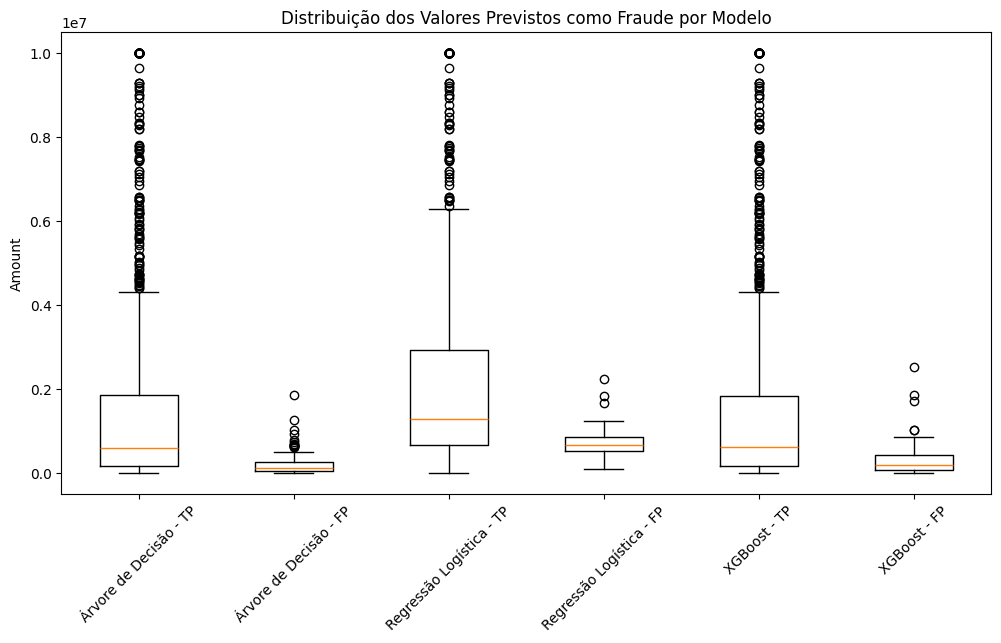

In [ ]:
import matplotlib.pyplot as plt

# Preparando dados para o box plot
data_tp_fp = {
    "Árvore de Decisão - TP": df_tp_tree_denorm['amount'],
    "Árvore de Decisão - FP": fp_tree['amount'],
    "Regressão Logística - TP": df_tp_log_denorm['amount'],
    "Regressão Logística - FP": fp_logreg['amount'],
    "XGBoost - TP": df_tp_xgb_denorm['amount'],
    "XGBoost - FP": fp_xgb['amount'],
}

# Criar o box plot
plt.figure(figsize=(12, 6))
plt.boxplot(data_tp_fp.values(), labels=data_tp_fp.keys())
plt.title("Distribuição dos Valores Previstos como Fraude por Modelo")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.show()


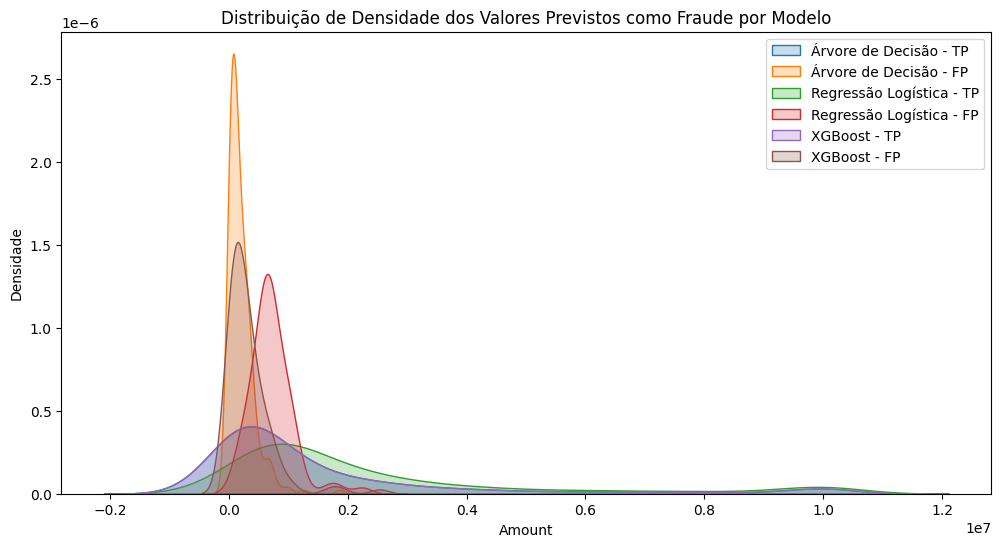

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de KDE para cada modelo e tipo de previsão
plt.figure(figsize=(12, 6))

# KDE para Árvore de Decisão
sns.kdeplot(df_tp_tree_denorm['amount'], label="Árvore de Decisão - TP", fill=True)
sns.kdeplot(fp_tree['amount'], label="Árvore de Decisão - FP", fill=True)

# KDE para Regressão Logística
sns.kdeplot(df_tp_log_denorm['amount'], label="Regressão Logística - TP", fill=True)
sns.kdeplot(fp_logreg['amount'], label="Regressão Logística - FP", fill=True)

# KDE para XGBoost
sns.kdeplot(df_tp_xgb_denorm['amount'], label="XGBoost - TP", fill=True)
sns.kdeplot(fp_xgb['amount'], label="XGBoost - FP", fill=True)

plt.title("Distribuição de Densidade dos Valores Previstos como Fraude por Modelo")
plt.xlabel("Amount")
plt.ylabel("Densidade")
plt.legend()
plt.show()


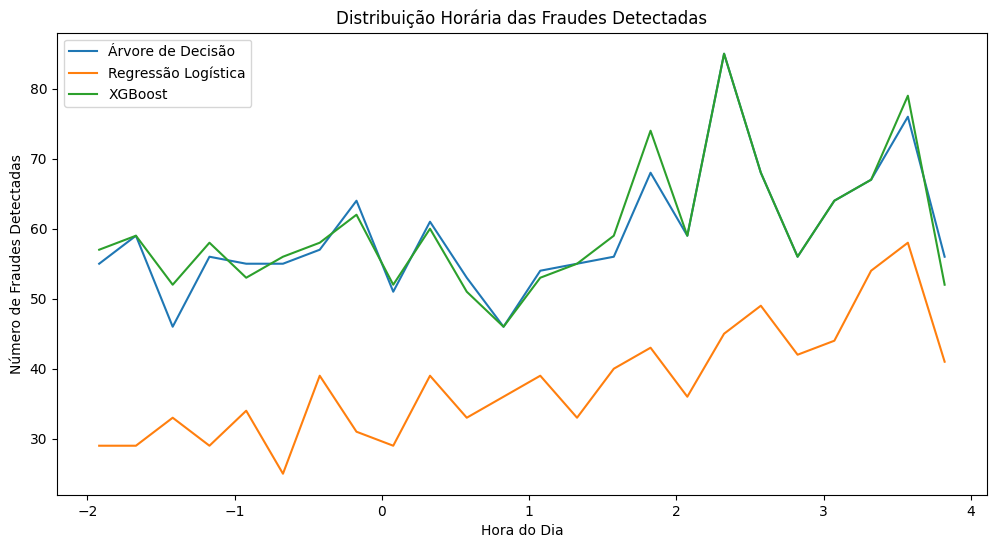

In [ ]:
# Exemplo para a Árvore de Decisão
fraude_horario_tree = df_tp_tree.groupby('hour').size()
fraude_horario_logreg = df_tp_logreg.groupby('hour').size()
fraude_horario_xgb = df_tp_xgb.groupby('hour').size()

# Gráfico de barras para mostrar a distribuição horária de fraudes detectadas para cada modelo
plt.figure(figsize=(12, 6))
plt.plot(fraude_horario_tree.index, fraude_horario_tree.values, label='Árvore de Decisão')
plt.plot(fraude_horario_logreg.index, fraude_horario_logreg.values, label='Regressão Logística')
plt.plot(fraude_horario_xgb.index, fraude_horario_xgb.values, label='XGBoost')
plt.title("Distribuição Horária das Fraudes Detectadas")
plt.xlabel("Hora do Dia")
plt.ylabel("Número de Fraudes Detectadas")
plt.legend()
plt.show()


Valor total das fraudes não detectadas pelo XGBoost: -21.45895941405373


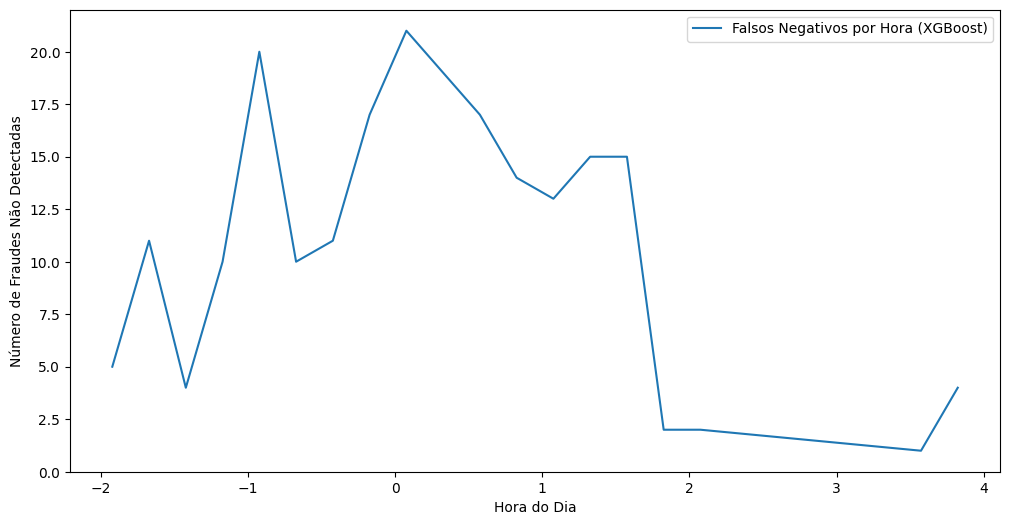

In [ ]:
# Exemplo de cálculo de valor total e horário dos falsos negativos para XGBoost
valor_fn_xgb = df_fn_xgb['amount'].sum()
horario_fn_xgb = df_fn_xgb.groupby('hour').size()

print(f"Valor total das fraudes não detectadas pelo XGBoost: {valor_fn_xgb}")
plt.figure(figsize=(12, 6))
plt.plot(horario_fn_xgb.index, horario_fn_xgb.values, label='Falsos Negativos por Hora (XGBoost)')
plt.xlabel("Hora do Dia")
plt.ylabel("Número de Fraudes Não Detectadas")
plt.legend()
plt.show()
